In [9]:
import matplotlib.pyplot as plt

import math,copy
import numpy as np
import pandas as pd

In [10]:
data= pd.read_csv(r"C:\Users\RHEA TIWARI\Downloads\archive (2)\Housing.csv")

In [11]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [12]:
x= np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y= np.array([460, 232, 178])


In [13]:
x

array([[2104,    5,    1,   45],
       [1416,    3,    2,   40],
       [ 852,    2,    1,   35]])

In [14]:
x

array([[2104,    5,    1,   45],
       [1416,    3,    2,   40],
       [ 852,    2,    1,   35]])

In [15]:
y

array([460, 232, 178])

In [16]:
x_features=["area","bedrooms","bathrooms","stories","parking"]

In [17]:
df=np.array(x)
print(df)

[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]


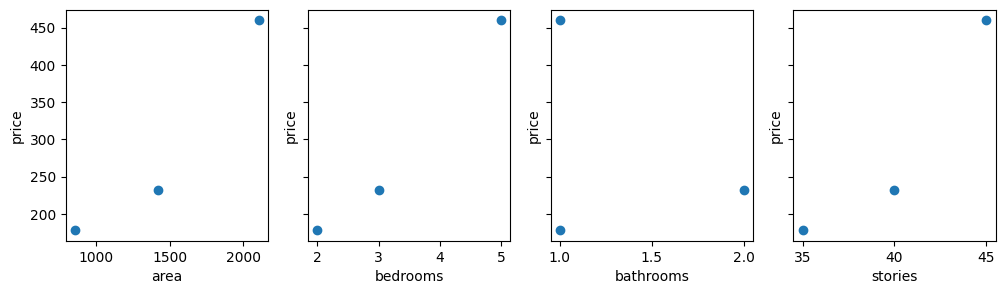

In [18]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(df[:, i],y)
    ax[i].set_xlabel(x_features[i])
    ax[i].set_ylabel("price")


In [19]:
def compute_cost(x,y,w,b):
    m,n=x.shape
    cost=0
    m, n = x.shape
    f_wb = np.zeros(m)
    for i in range(m):
      f_wb = np.dot(x[i], w) + b
      cost=(f_wb-y[i])**2 + cost
    
    total_cost=cost/(2*m)
    return total_cost
        
        
    
    
    

In [20]:
w=np.zeros(x.shape[1])
b=0
print(x.shape)
tmp_cost=compute_cost(x,y,w,b)
print(tmp_cost)

(3, 4)
49518.0


## Normalising

In [71]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def min_max_normalize(matrix):
    min_vals = np.min(matrix, axis=0)
    max_vals = np.max(matrix, axis=0)
    normalized_matrix = (matrix - min_vals) / (max_vals - min_vals)
    return normalized_matrix

# Example usage


norm_x = min_max_normalize(x)
print(norm_x)



[[1.         1.         0.         1.        ]
 [0.45047923 0.33333333 1.         0.5       ]
 [0.         0.         0.         0.        ]]


In [72]:
scaler_y = MinMaxScaler()

# Reshape y to 2D array and fit-transform
y_norm =min_max_normalize(y)
print(y_norm)
# Create a new DataFrame with the normalized target variable

print(y_norm)

[1.         0.19148936 0.        ]
[1.         0.19148936 0.        ]


## Gradient Descent

In [73]:
def comp_descent(x, y, w, b):
    m, n = x.shape
    temp = np.zeros(n)

    for i in range(m):
        f_wb = np.dot(w, x[i]) + b

        for j in range(n):
            
            temp[j] += (f_wb - y[i]) * x[i][j]

    dj_dw = temp / m
    dj_db = (f_wb - y[i])  # This might need adjustment based on your specific requirements

    return dj_dw, dj_db

    

        
        

In [122]:
iters=10000
w_init=np.zeros(x.shape[1])
b_init=0
m,n=x.shape
j_wb=[]
it=[]
w_f=[]

f=np.zeros(n)

def gradient_descent(x,y,w,b,iters,lr):
    m,n=x.shape
    j=0
    dj_dw=np.zeros(m)
    dj_db=np.zeros(m)
    for i in range(iters):
        dj_dw,dj_db=comp_descent(x,y,w,b)
        temp_w=w-lr*dj_dw
        temp_b=b-lr*dj_db
        w=temp_w
        for k in range(n):
            w_f.append(w[k])
        b=temp_b
        
        f=compute_cost(x,y,w,b)
        j_wb.append(f)
        it.append(i)

        
        if i%500 == 0:
            print(f"Iteration {i:3}: Cost  {compute_cost(x, y, w, b)}\n"
                  f"dj_dw: {dj_dw}\n"
                  f"dj_db: {dj_db}\n"
                  f"w: {w}\n"
                  f"b: {b}")

      
    print(f"final w{w} and final b is {b}")
    return w,b,j_wb,it,w_f
    
        

In [123]:
j_wb=[]
it=[]
w_f=[]
lr=0.0003
print(type(x))
print(type(y))

X_norm= (x - np.mean(x, axis=0)) / np.std(x, axis=0)
y_norm = (y - np.mean(y)) / np.std(y)
w,b,j_wb,it,w_f=gradient_descent(X_norm,y_norm,w_init,b_init,iters,lr)

   

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Iteration   0: Cost  0.4991310414002348
dj_dw: [-0.95963319 -0.98845582  0.33557983 -0.94201177]
dj_db: 0.9164333182403027
w: [ 0.00028789  0.00029654 -0.00010067  0.0002826 ]
b: -0.0002749299954720908
Iteration 500: Cost  0.21609990430211068
dj_dw: [-0.60938909 -0.63416355  0.26182014 -0.59541324]
dj_db: 0.4449771348129957
w: [ 0.1159459   0.11996607 -0.044594    0.11358535]
b: -0.09925086942557289
Iteration 1000: Cost  0.10207803226069391
dj_dw: [-0.3862603  -0.40755515  0.20804992 -0.37499463]
dj_db: 0.16885816794328778
w: [ 0.18933192  0.19680018 -0.07962165  0.1850883 ]
b: -0.14335173089049974
Iteration 1500: Cost  0.053799065277911166
dj_dw: [-0.24421203 -0.26251599  0.16797893 -0.23500564]
dj_db: 0.013224219885513921
w: [ 0.23579614  0.24622821 -0.10767637  0.23002421]
b: -0.15582266293754704
Iteration 2000: Cost  0.031504635069858046
dj_dw: [-0.15386704 -0.16960019  0.13745997 -0.1462582 ]
dj_db: -0.0690150144319176
w: [ 0.2651285

In [124]:
import numpy as np

# Define predict function
def predict(X, w, b):
    predictions = np.dot(X, w) + b
    return predictions

# Example usage with your normalized test data
X_test = np.array([[1, 2, 3, 4]])  # Replace with your actual test data
y_pred = predict(X_test, w, b)

print("Predicted values:", y_pred)


Predicted values: [1.45495453]


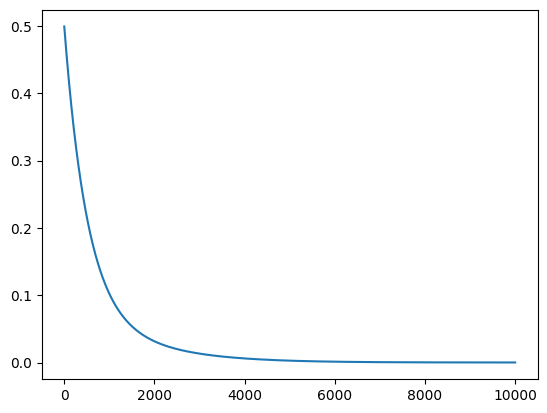

In [76]:
plt.plot(it,j_wb)

ValueError: x and y must have same first dimension, but have shapes (40000,) and (10000,)

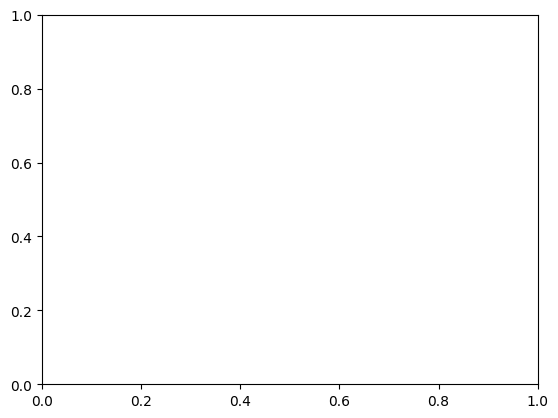

In [77]:
plt.plot(w_f,j_wb)

In [78]:
epsilon=np.array([0.0000001,0.0000001,0.0000001,0.0000001])
old_cost=np.ones(n)
print(old_cost)
w_f=[]
j_wb=[]
it=[]
def gradient_descent_final(x,y,w,b,iters,lr,epsilon,old_cost):
    m,n=x.shape
    i=0
    dj_dw=np.zeros(n)
    dj_db=np.zeros(n)
    new_cost=compute_cost(x,y,w,b)
    new_f=new_cost
    old=(old_cost-new_f)
    #old=float(old)
   
    while(epsilon<(old_cost-new_cost)).any():
        dj_dw,dj_db=comp_descent(x,y,w,b)
        temp_w=w-lr*dj_dw
        temp_b=b-lr*dj_db
        w=temp_w
        w_f.append(w)
        b=temp_b
        f=compute_cost(x,y,w,b)
        
        j_wb.append(f)
        
        it.append(i)
        i=i+1
        old_cost=new_cost
        new_cost=f
        

        
        if (i%1000 == 0):
            print(f"Iteration {i:3}: Cost  {compute_cost(x, y, w, b)}\n"
                  f"dj_dw: {dj_dw}\n"
                  f"dj_db: {dj_db}\n"
                  f"w: {w}\n"
                  f"b: {b}")
   

      
    print(f"final w{w} and final b is {b}")
    return w,b,j_wb,it,w_f
    





[1. 1. 1. 1.]


In [79]:
w_fin,b_fin,j_wb_fin,it_fin,w_f_fin=gradient_descent_final(X_norm,y_norm,w_init,b_init,2000,lr,epsilon,old_cost)

Iteration 1000: Cost  0.10222046801397226
dj_dw: [-0.38661356 -0.40791486  0.20814211 -0.3753432 ]
dj_db: 0.16927066645681876
w: [ 0.18921604  0.19667792 -0.07955924  0.18497581]
b: -0.14330107344011675
Iteration 2000: Cost  0.03153556667810486
dj_dw: [-0.15400992 -0.16974784  0.13751348 -0.14639825]
dj_db: -0.06890199600046343
w: [ 0.26508238  0.27805727 -0.13043885  0.25805669]
b: -0.15094512216217712
Iteration 3000: Cost  0.013208094936895252
dj_dw: [-0.06014931 -0.07177686  0.09496976 -0.05481704]
dj_db: -0.12007164588914232
w: [ 0.29508337  0.3121314  -0.16481053  0.28614126]
b: -0.12001874844808416
Iteration 4000: Cost  0.0060474535917529534
dj_dw: [-0.02258356 -0.03117427  0.06746493 -0.01876269]
dj_db: -0.1095826950143749
w: [ 0.3066335   0.32669087 -0.1888933   0.29633317]
b: -0.08482442186661958
Iteration 5000: Cost  0.0027502155485397695
dj_dw: [-0.00777922 -0.01412624  0.04874409 -0.00500466]
dj_db: -0.08404963563874579
w: [ 0.31084144  0.33312218 -0.20615168  0.29956112]
b

In [80]:
def comp(x,y,w,b):
    m,n=x.shape
    f_wb=[]
    j=0
    for i in range(m):
        f_wb.append(np.dot(w,x[i])+b)
        
        j=j+1
    
    return f_wb

In [81]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your dataframe
# df_normalized = normalization_process(df)

# Create a scaler and fit it on the original dataframe
scaler = MinMaxScaler()
scaler.fit(w_fin.reshape(-1, 1))

# Transform the normalized dataframe back to the original scale
w_denorm = pd.DataFrame(scaler.inverse_transform(w_fin.reshape(-1, 1)))


In [82]:
w_fin

array([ 0.31224279,  0.33878128, -0.23837869,  0.29912196])

In [83]:
x_arr=np.array(x)


In [84]:
x_arr

array([[2104,    5,    1,   45],
       [1416,    3,    2,   40],
       [ 852,    2,    1,   35]])

In [85]:
print((y))

[460 232 178]


In [86]:
y_ar=np.array(y)

In [87]:
y_arr=y_ar.reshape(-1, 1)

In [88]:
y_arr

array([[460],
       [232],
       [178]])

In [89]:
f_wb=comp(X_norm,y_norm,w_fin,b_fin)

In [90]:
f_wb_arr=[]
j=0
for i in (f_wb):
    f_wb_arr.append(i)
    j=j+1

In [91]:
f_wb_arr

[1.3768490687905461, -0.4580427712869324, -0.9343232158506135]

In [92]:
j

3

In [93]:
k=0
for i in y_arr:
    k=k+1
print(k)    

3


In [94]:
y_norm

array([ 1.39101486, -0.47458154, -0.91643332])

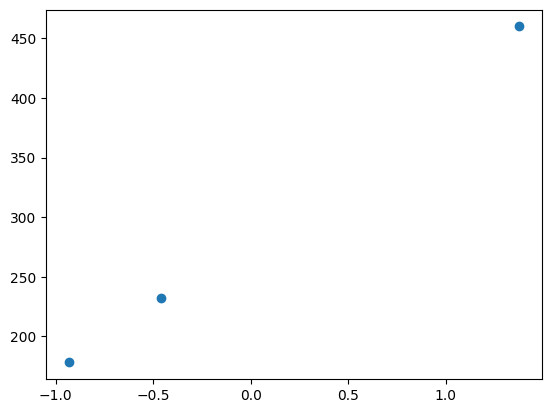

In [95]:
plt.scatter(f_wb_arr,y_arr)

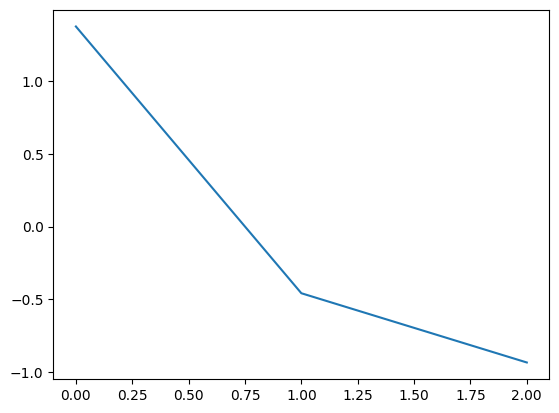

In [96]:
plt.plot(f_wb_arr)

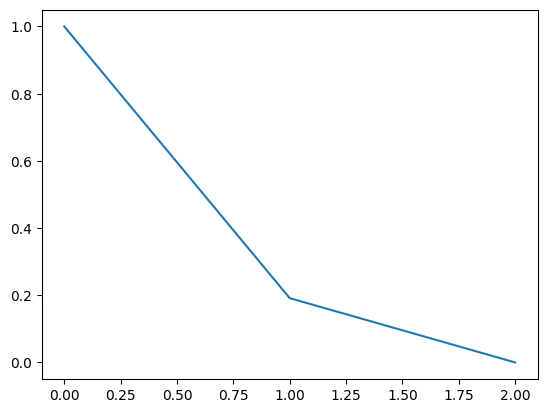

In [97]:
plt.plot(y_no)

In [98]:
epsilon=np.array([0.000001,0.000001,0.000001,0.000001])
old_cost=np.ones(n)*50000

w_f=[]
j_wb=[]
it=[]
iters=1000
w_init=np.zeros(x.shape[1])
b_init=0
def gradient_descent_fin(x,y,w,b,iters,lr,epsilon,old_cost):
    m,n=x.shape
    i=0
    dj_dw=np.zeros(n)
    dj_db=np.zeros(n)
    new_cost=compute_cost(x,y,w,b)
    print(new_cost)
    #old=(old_cost-new_f)
    #old=float(old)
    print(old_cost-new_cost)
   
    while(i<100):
        print(i)
        dj_dw,dj_db=comp_descent(x,y,w,b)
        temp_w=w-lr*dj_dw
        temp_b=b-lr*dj_db
        w=temp_w
        w_f.append(w)
        b=temp_b
        f=compute_cost(x,y,w,b)
        
        j_wb.append(f)
        
        it.append(i)
        
        old_cost=new_cost
        new_cost=f
        print(new_cost)
        
        print(i)

        print(old_cost-new_cost)
        if (i%10 == 0):
            print(f"Iteration {i:3}: Cost  {compute_cost(x, y, w, b)}\n"
                  f"dj_dw: {dj_dw}\n"
                  f"dj_db: {dj_db}\n"
                  f"w: {w}\n"
                  f"b: {b}")
        i=i+1

      
    print(f"final w{w} and final b is {b}")
    return w,b,j_wb,it
    





In [99]:
f_arr=np.array(f_wb_arr)
print(type(f_arr))
print(f_arr)

<class 'numpy.ndarray'>
[ 1.37684907 -0.45804277 -0.93432322]


In [100]:
x_max = np.max(x_arr)

In [101]:
y_max = np.max(y)
print(y_max)

460


In [102]:
x_min=np.min(x_arr)

In [103]:
y_min=np.min(y)
print(y_min)

178


In [104]:
prediction=reverse_min_max_normalize(f_arr,y_min,y_max)

[ 1.37684907 -0.45804277 -0.93432322]


In [105]:
prediction

array([566.2714374 ,  48.8319385 , -85.47914687])

In [106]:
y

array([460, 232, 178])

In [107]:
y_norm

array([ 1.39101486, -0.47458154, -0.91643332])

In [108]:
import numpy as np

def min_max_normaliz(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data

# Example usage
y_no= min_max_normaliz(y)
x_no=min_max_normaliz(x)

In [109]:
y_no

array([1.        , 0.19148936, 0.        ])

In [110]:
x_no

array([[1.        , 1.        , 0.        , 1.        ],
       [0.45047923, 0.33333333, 1.        , 0.5       ],
       [0.        , 0.        , 0.        , 0.        ]])

In [111]:
def reverse_min_max_normalize(normalized_data, min_vals, max_vals):
    print(normalized_data)
    reversed_data = normalized_data * (max_vals - min_vals) + min_vals
    
    return reversed_data


In [112]:
predict=reverse_min_max_normalize(f_arr,y_min, y_max)

[ 1.37684907 -0.45804277 -0.93432322]


In [113]:
predict

array([566.2714374 ,  48.8319385 , -85.47914687])

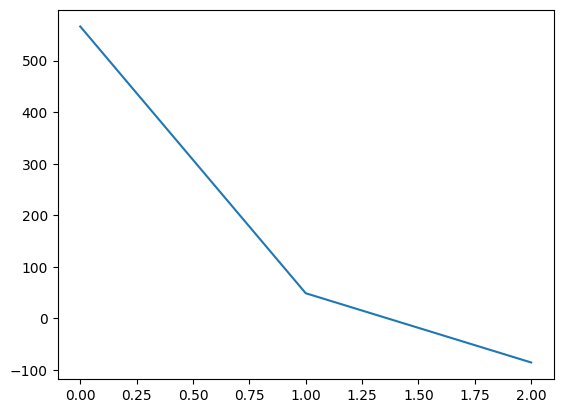

In [114]:
plt.plot(predict)

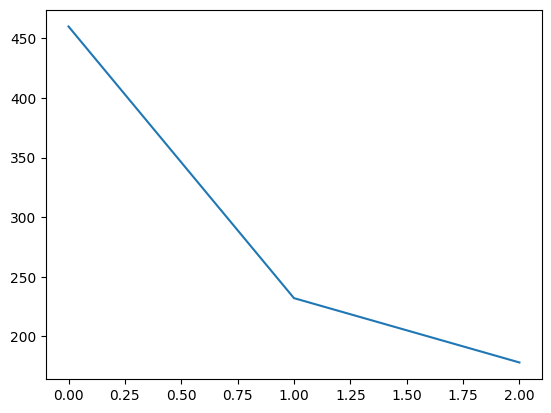

In [115]:
plt.plot(y)

In [116]:
predict=reverse_min_max_normalize(f_arr,y_min, y_max)

[ 1.37684907 -0.45804277 -0.93432322]


In [117]:
predict

array([566.2714374 ,  48.8319385 , -85.47914687])

In [118]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Assuming `y` is the true values and `predict` is the predicted values
mae = mean_absolute_error(y, predict)
mse = mean_squared_error(y, predict)
rmse = root_mean_squared_error(y, predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 184.30621525724067
Mean Squared Error: 38088.472665615765
Root Mean Squared Error: 195.16268256410027


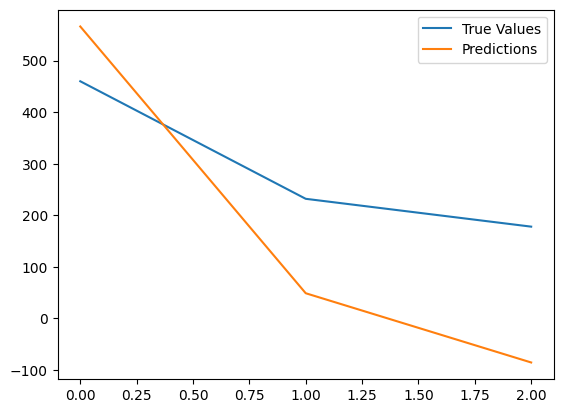

In [121]:
import matplotlib.pyplot as plt

plt.plot(y, label='True Values')
plt.plot(predict, label='Predictions')
plt.legend()
plt.show()


Linear Regression

In [125]:
data= pd.read_csv(r"C:\Users\RHEA TIWARI\Downloads\archive (2)\Housing.csv")

In [126]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [131]:
import numpy as np
from sklearn.model_selection import train_test_split


In [132]:
X_df=data.drop(columns=['price'])
y_df=data['price']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

print("Training features:\n", X_train)
print("Training labels:\n", y_train)
print("Testing features:\n", X_test)
print("Testing labels:\n", y_test)

Training features:
      area  bedrooms  bathrooms  stories mainroad guestroom basement  \
46   6000         3          2        4      yes        no       no   
93   7200         3          2        1      yes        no      yes   
335  3816         2          1        1      yes        no      yes   
412  2610         3          1        2      yes        no      yes   
471  3750         3          1        2      yes        no       no   
..    ...       ...        ...      ...      ...       ...      ...   
71   6000         4          2        4      yes        no       no   
106  5450         4          2        1      yes        no      yes   
270  4500         3          2        3      yes        no       no   
435  4040         2          1        1      yes        no       no   
102  5500         3          2        4      yes       yes       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
46               no             yes        1       no 

In [ ]:
epsilon=epsilon = np.array([0.000001] * X_train.shape[1])

old_cost=np.ones(n)*50000

w_f=[]
j_wb=[]
it=[]
iters=1000
w_init=np.zeros(x.shape[1])
b_init=0
def gradient_descent_fin(x,y,w,b,iters,lr,epsilon,old_cost):
    m,n=x.shape
    i=0
    dj_dw=np.zeros(n)
    dj_db=np.zeros(n)
    new_cost=compute_cost(x,y,w,b)
    print(new_cost)
    #old=(old_cost-new_f)
    #old=float(old)
    print(old_cost-new_cost)
   
    while(i<iters):
        print(i)
        dj_dw,dj_db=comp_descent(x,y,w,b)
        temp_w=w-lr*dj_dw
        temp_b=b-lr*dj_db
        w=temp_w
        w_f.append(w)
        b=temp_b
        f=compute_cost(x,y,w,b)
        
        j_wb.append(f)
        
        it.append(i)
        
        old_cost=new_cost
        new_cost=f
        print(new_cost)
        
        print(i)

        print(old_cost-new_cost)
        if (i%10 == 0):
            print(f"Iteration {i:3}: Cost  {compute_cost(x, y, w, b)}\n"
                  f"dj_dw: {dj_dw}\n"
                  f"dj_db: {dj_db}\n"
                  f"w: {w}\n"
                  f"b: {b}")
        i=i+1

      
    print(f"final w{w} and final b is {b}")
    return w,b,j_wb,it
    



